In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
walmart_data = pd.read_csv('walmart_data.csv')

In [3]:
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart_data.shape

(550068, 10)

In [5]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- There are no null values in the given data

In [6]:
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
walmart_data.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


<AxesSubplot:xlabel='Purchase'>

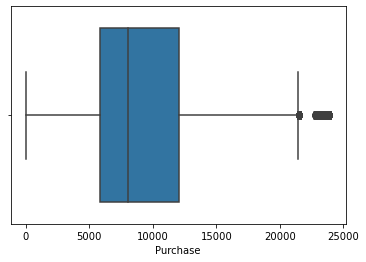

In [8]:
sns.boxplot(data=walmart_data,x='Purchase')

<AxesSubplot:xlabel='Purchase'>

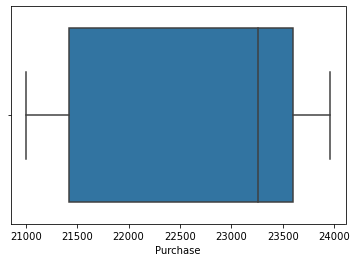

In [9]:
sns.boxplot(data=walmart_data[walmart_data['Purchase']>21000],x='Purchase')

- There are Products with price greater than 20000, so they are not outliers.

Lets group the data with users

In [10]:
A=pd.DataFrame(walmart_data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum()).reset_index()
A.rename(columns={'Purchase':'Total_Purchase'},inplace=True)

#sum of all purchases by each user

In [11]:
B=pd.DataFrame(walmart_data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'])['Product_ID'].nunique()).reset_index()
B.rename(columns={'Product_ID':'No.of Products'},inplace=True)

#Number of products bought by each user

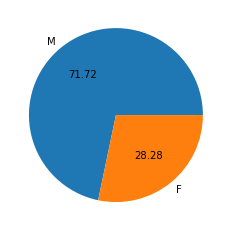

In [12]:
plt.pie(A['Gender'].value_counts(),autopct='%.2f',labels=A['Gender'].value_counts().index)
plt.show()

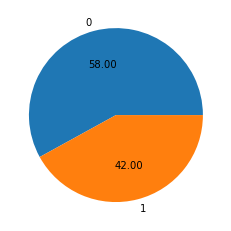

In [13]:
plt.pie(A['Marital_Status'].value_counts(),autopct='%.2f',labels=A['Marital_Status'].value_counts().index)
plt.show()

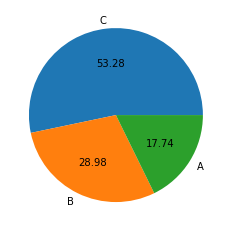

In [14]:
plt.pie(A['City_Category'].value_counts(),autopct='%.2f',labels=A['City_Category'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

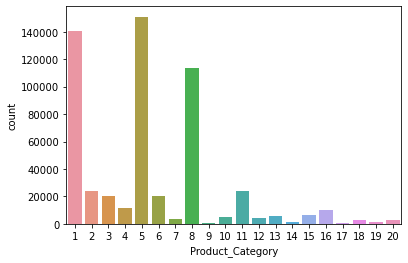

In [15]:
sns.countplot(data=walmart_data,x='Product_Category')

In [16]:
walmart_data['User_ID'].nunique()

5891

<AxesSubplot:xlabel='City_Category', ylabel='Total_Purchase'>

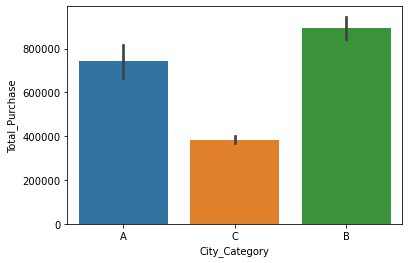

In [17]:
sns.barplot(data=A,x='City_Category',y='Total_Purchase',estimator=np.median)

<AxesSubplot:xlabel='City_Category', ylabel='Total_Purchase'>

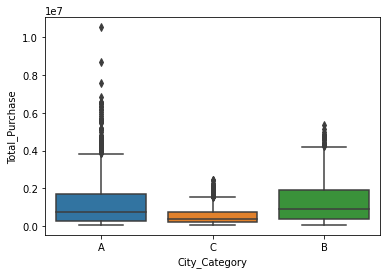

In [18]:
sns.boxplot(data=A,x='City_Category',y='Total_Purchase')

- A city is having more expenses per user than B, C cities.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Total_Purchase'>

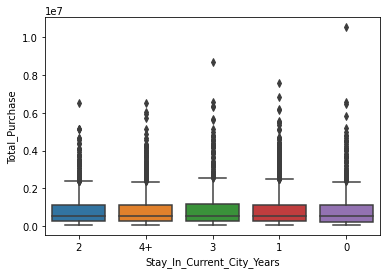

In [44]:
sns.boxplot(data=A,x='Stay_In_Current_City_Years',y='Total_Purchase')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Total_Purchase'>

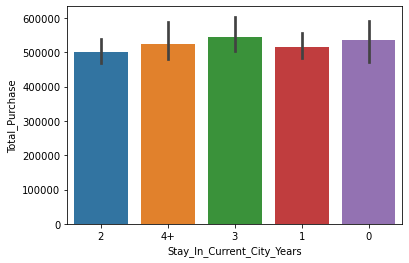

In [45]:
sns.barplot(data=A,x='Stay_In_Current_City_Years',y='Total_Purchase',estimator=np.median)

- There is no much difference in expenses with respect to Stay_In_Current_City_Years

In [19]:
users=pd.DataFrame(walmart_data[['User_ID','Gender']].groupby(['User_ID','Gender']).nunique())
users.reset_index([0,1],inplace=True)
b=users[users['Gender']=='M'].sample(n=sum(users['Gender']=='F'))
fifty=pd.concat([users[users['Gender']=='F'],b])

In [20]:
data_gen = pd.merge(walmart_data, fifty)[walmart_data.columns]

- creating data with same proportion of male and female users to visualize any more probability in choosing product category with gender or marital or age

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

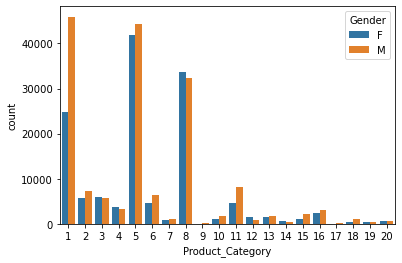

In [21]:
sns.countplot(data=data_gen,x='Product_Category',hue='Gender')

- Product category 1 is purchased more by male

- product category 8 is purchased slightly more by female

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

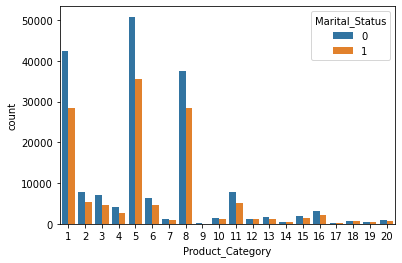

In [22]:
sns.countplot(data=data_gen,x='Product_Category',hue='Marital_Status')

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

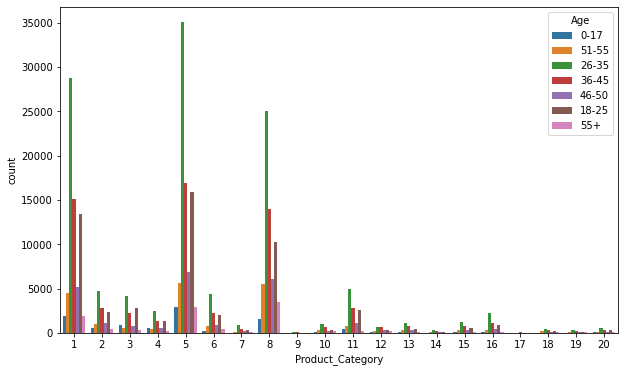

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_gen,x='Product_Category',hue='Age')

- Not much difference with age to any product category

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

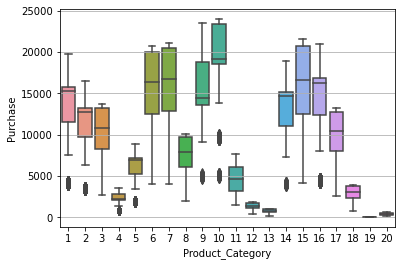

In [24]:
plt.grid()
sns.boxplot(data=walmart_data,x='Product_Category',y='Purchase')


- There are reasonably many products out of the range but we cannot consider them as outliers

### Confidence Interval and CLT

#### Male vs Female 

90%

In [25]:
values=np.array([np.random.choice(A[A['Gender']=='M']['Total_Purchase'],size=len(A[A['Gender']=='M']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of male total purchase ',np.percentile(values,[100*(1-0.90)/2,100*(1-(1-0.9)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.645*s,m+1.645*s]
print('Central limit of male total purchase ',clt)

Confidence interval of male total purchase  [901971.65821302 949016.9036213 ]
Central limit of male total purchase  [901119.6348061577, 949819.0269822447]


In [26]:
values=np.array([np.random.choice(A[A['Gender']=='F']['Total_Purchase'],size=len(A[A['Gender']=='F']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of female total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.645*s,m+1.645*s]
print('Central limit of female total purchase ',clt)

Confidence interval of female total purchase  [675051.09518307 751740.14063625]
Central limit of female total purchase  [680168.6579296949, 744885.7436117217]


- Female mean is less than Male mean of purchase

- We can conclude that Male purchase more and there is no overlapping in intervals.

95%

In [27]:
values=np.array([np.random.choice(A[A['Gender']=='M']['Total_Purchase'],size=len(A[A['Gender']=='M']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of male total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of male total purchase ',clt)

Confidence interval of male total purchase  [896387.67166864 956534.49822485]
Central limit of male total purchase  [895087.8274350985, 955329.176390227]


In [28]:
values=np.array([np.random.choice(A[A['Gender']=='F']['Total_Purchase'],size=len(A[A['Gender']=='F']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of female total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of female total purchase ',clt)

Confidence interval of female total purchase  [672372.8340036  751067.24602341]
Central limit of female total purchase  [672911.3325581824, 750308.6352089247]


99%

In [29]:
values=np.array([np.random.choice(A[A['Gender']=='M']['Total_Purchase'],size=len(A[A['Gender']=='M']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of male total purchase ',np.percentile(values,[100*(1-0.99)/2,100*(1-(1-0.99)/2)])) 

m=values.mean()
s=values.std()
clt=[m-2.576*s,m+2.576*s]
print('Central limit of male total purchase ',clt)

Confidence interval of male total purchase  [887098.98822012 962630.99757515]
Central limit of male total purchase  [887205.7452087209, 963718.0364594448]


In [30]:
values=np.array([np.random.choice(A[A['Gender']=='F']['Total_Purchase'],size=len(A[A['Gender']=='F']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of female total purchase ',np.percentile(values,[100*(1-0.99)/2,100*(1-(1-0.99)/2)])) 

m=values.mean()
s=values.std()
clt=[m-2.576*s,m+2.576*s]
print('Central limit of female total purchase ',clt)

Confidence interval of female total purchase  [659392.21262305 759208.61794418]
Central limit of female total purchase  [662189.3276626193, 761714.0453397816]


#### Married vs Unmarried

90%

In [31]:
values=np.array([np.random.choice(A[A['Marital_Status']==0]['Total_Purchase'],size=len(A[A['Marital_Status']==0]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Unmarried total purchase ',np.percentile(values,[100*(1-0.9)/2,100*(1-(1-0.9)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.645*s,m+1.645*s]
print('Central limit of Unmarried total purchase ',clt)

Confidence interval of Unmarried total purchase  [854543.49891718 908032.17038338]
Central limit of Unmarried total purchase  [854788.718739602, 907653.5823736554]


In [32]:
values=np.array([np.random.choice(A[A['Marital_Status']==1]['Total_Purchase'],size=len(A[A['Marital_Status']==1]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of married total purchase ',np.percentile(values,[100*(1-0.9)/2,100*(1-(1-0.9)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.645*s,m+1.645*s]
print('Central limit of married total purchase ',clt)

Confidence interval of married total purchase  [813422.06234842 875384.27605093]
Central limit of married total purchase  [813469.7392588297, 874642.9669165947]


- Unmarried users expenses are more compared to married

- There is overlapping of intervals for unmarried and married users.

95%

In [33]:
values=np.array([np.random.choice(A[A['Marital_Status']==0]['Total_Purchase'],size=len(A[A['Marital_Status']==0]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Unmarried total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Unmarried total purchase ',clt)

Confidence interval of Unmarried total purchase  [848416.44871964 911101.63833772]
Central limit of Unmarried total purchase  [849021.2371542691, 912450.3895159094]


In [34]:
values=np.array([np.random.choice(A[A['Marital_Status']==1]['Total_Purchase'],size=len(A[A['Marital_Status']==1]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of married total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of married total purchase ',clt)

Confidence interval of married total purchase  [807007.03719685 881073.00994341]
Central limit of married total purchase  [805997.9056611797, 879305.5689273409]


99%

In [35]:
values=np.array([np.random.choice(A[A['Marital_Status']==0]['Total_Purchase'],size=len(A[A['Marital_Status']==0]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Unmarried total purchase ',np.percentile(values,[100*(1-0.99)/2,100*(1-(1-0.99)/2)])) 

m=values.mean()
s=values.std()
clt=[m-2.576*s,m+2.576*s]
print('Central limit of Unmarried total purchase ',clt)

Confidence interval of Unmarried total purchase  [841451.19091601 922998.19936348]
Central limit of Unmarried total purchase  [838551.3232096685, 921932.8335102613]


In [36]:
values=np.array([np.random.choice(A[A['Marital_Status']==1]['Total_Purchase'],size=len(A[A['Marital_Status']==1]['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of married total purchase ',np.percentile(values,[100*(1-0.99)/2,100*(1-(1-0.99)/2)])) 

m=values.mean()
s=values.std()
clt=[m-2.576*s,m+2.576*s]
print('Central limit of married total purchase ',clt)

Confidence interval of married total purchase  [795488.62008286 893993.22547494]
Central limit of married total purchase  [795031.2430336766, 892189.4927310767]


#### By Age

In [37]:
values=np.array([np.random.choice(A[A['Age']=='0-17']['Total_Purchase'],size=len(A[A['Age']=='0-17']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 0-17 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 0-17 total purchase ',clt)

Confidence interval of Age 0-17 total purchase  [536917.56169725 716724.15642202]
Central limit of Age 0-17 total purchase  [529123.5966098601, 711014.7243442681]


In [38]:
values=np.array([np.random.choice(A[A['Age']=='18-25']['Total_Purchase'],size=len(A[A['Age']=='18-25']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 18-25 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 18-25 total purchase ',clt)

Confidence interval of Age 18-25 total purchase  [804788.5666043 907333.8695276]
Central limit of Age 18-25 total purchase  [803875.2920436998, 908250.2889441395]


In [39]:
values=np.array([np.random.choice(A[A['Age']=='26-35']['Total_Purchase'],size=len(A[A['Age']=='26-35']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 26-35 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 26-35 total purchase ',clt)

Confidence interval of Age 26-35 total purchase  [ 947618.1325621  1036206.60071846]
Central limit of Age 26-35 total purchase  [945528.2721505108, 1034887.7048158798]


In [40]:
values=np.array([np.random.choice(A[A['Age']=='36-45']['Total_Purchase'],size=len(A[A['Age']=='36-45']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 36-45 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 36-45 total purchase ',clt)

Confidence interval of Age 36-45 total purchase  [822213.19558698 937598.21343188]
Central limit of Age 36-45 total purchase  [824582.5476063185, 936300.7636636042]


In [41]:
values=np.array([np.random.choice(A[A['Age']=='46-50']['Total_Purchase'],size=len(A[A['Age']=='46-50']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 46-50 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 46-50 total purchase ',clt)

Confidence interval of Age 46-50 total purchase  [716578.31694915 870797.97721281]
Central limit of Age 46-50 total purchase  [713448.9574009744, 867404.0395971427]


In [42]:
values=np.array([np.random.choice(A[A['Age']=='51-55']['Total_Purchase'],size=len(A[A['Age']=='51-55']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 51-55 total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 51-55 total purchase ',clt)

Confidence interval of Age 51-55 total purchase  [695591.41055094 830980.4799896 ]
Central limit of Age 51-55 total purchase  [694156.3716591604, 830098.1103574717]


In [43]:
values=np.array([np.random.choice(A[A['Age']=='55+']['Total_Purchase'],size=len(A[A['Age']=='55+']['Total_Purchase']),replace=True).mean() for i in range(1000)]) 
print('Confidence interval of Age 55+ total purchase ',np.percentile(values,[100*(1-0.95)/2,100*(1-(1-0.95)/2)])) 

m=values.mean()
s=values.std()
clt=[m-1.96*s,m+1.96*s]
print('Central limit of Age 55+ total purchase ',clt)

Confidence interval of Age 55+ total purchase  [474964.77137097 598878.52573925]
Central limit of Age 55+ total purchase  [477040.0236867421, 603165.2496358384]


- Highest mean of expenses of users in Age 26-35.